# Bodyfat prework

# Question 1

## Import data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_excel('BodyFat.xls')
data.head()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Explore correlation with adiposity

In [46]:
adiposity_corr = data.corr()['ADIPOSITY']
print(adiposity_corr)

IDNO         0.047717
BODYFAT      0.727994
DENSITY     -0.714732
AGE          0.118851
WEIGHT       0.887352
HEIGHT      -0.024891
ADIPOSITY    1.000000
NECK         0.777857
CHEST        0.911799
ABDOMEN      0.923880
HIP          0.883269
THIGH        0.812706
KNEE         0.713660
ANKLE        0.500317
BICEPS       0.746384
FOREARM      0.558594
WRIST        0.625907
Name: ADIPOSITY, dtype: float64


In [45]:
adiposity_corr.sort_values(ascending=False)  

ADIPOSITY    1.000000
ABDOMEN      0.923880
CHEST        0.911799
WEIGHT       0.887352
HIP          0.883269
THIGH        0.812706
NECK         0.777857
BICEPS       0.746384
BODYFAT      0.727994
KNEE         0.713660
WRIST        0.625907
FOREARM      0.558594
ANKLE        0.500317
AGE          0.118851
IDNO         0.047717
HEIGHT      -0.024891
DENSITY     -0.714732
Name: ADIPOSITY, dtype: float64

Let's graph the correlations (note that color scale was reversed for readability)

In [19]:
def label_graph(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    ax.matshow(corr, cmap='hot_r')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

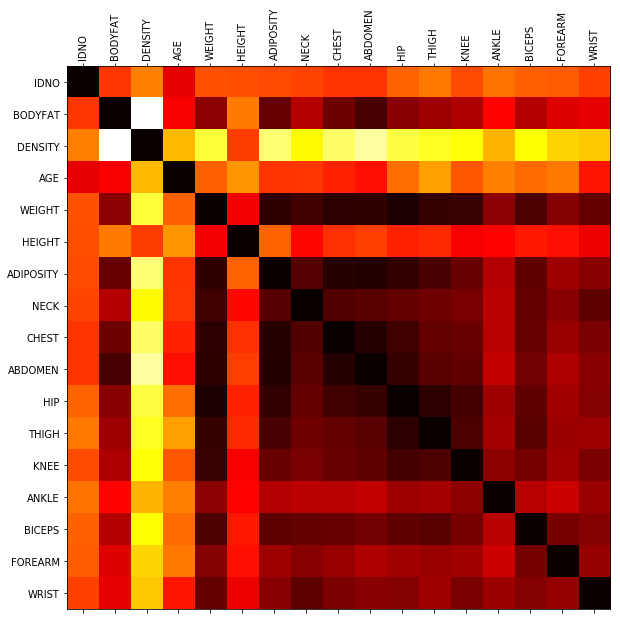

In [20]:
label_graph(data)

## Answer 1

By looking at the correlation between Adiposity and the other features we can notice that the size of the Abdomen has the highest correlation. We can also observe this from the graph. So the best thing to measure in order to predict how fat a person is would be the abdomen. 

# Question 2

## Split by age

Let's look at the data for people above 45 years old

In [26]:
data_under45 = data[data['AGE'] < 45]
data_over45 = data[data['AGE'] >= 45]

print("Under 45: ", data_under45.size)
print("Over 45: ",data_over45.size)

Under 45:  2312
Over 45:  1972


## Correlation by age split

In [47]:
under45_corr = data_under45.corr()['ADIPOSITY']
over45_corr = data_over45.corr()['ADIPOSITY']

Let's look at the difference between both age categories

In [48]:
corr_diff = {}
for i in range(data.columns.values.size):
    diff = under45_corr[i] - over45_corr[i]
    corr_diff[data.columns[i]] = diff
    
corr_diff

{'ABDOMEN': -0.020820580840045233,
 'ADIPOSITY': 0.0,
 'AGE': 0.024507558141896868,
 'ANKLE': -0.06194043011693734,
 'BICEPS': 0.08871955387814023,
 'BODYFAT': -0.04490096372751273,
 'CHEST': 0.004175860726502445,
 'DENSITY': 0.02861417819300538,
 'FOREARM': -0.014162800579309187,
 'HEIGHT': 0.03514388196089998,
 'HIP': -0.010269505864226813,
 'IDNO': 0.05891215582800935,
 'KNEE': 0.10830842534469676,
 'NECK': -0.030663409124133456,
 'THIGH': 0.03210502074934207,
 'WEIGHT': 0.0049510416404691115,
 'WRIST': 0.036528410574490966}

To compare the results, let's look at the absolute values, as we are looking the largest delta, might it be positive or negative

In [66]:
abs_corr_diff = {}
for i in corr_diff:
    abs_corr_diff[i] = abs(corr_diff[i])
    
abs_corr_diff

{'ABDOMEN': 0.020820580840045233,
 'ADIPOSITY': 0.0,
 'AGE': 0.024507558141896868,
 'ANKLE': 0.06194043011693734,
 'BICEPS': 0.08871955387814023,
 'BODYFAT': 0.04490096372751273,
 'CHEST': 0.004175860726502445,
 'DENSITY': 0.02861417819300538,
 'FOREARM': 0.014162800579309187,
 'HEIGHT': 0.03514388196089998,
 'HIP': 0.010269505864226813,
 'IDNO': 0.05891215582800935,
 'KNEE': 0.10830842534469676,
 'NECK': 0.030663409124133456,
 'THIGH': 0.03210502074934207,
 'WEIGHT': 0.0049510416404691115,
 'WRIST': 0.036528410574490966}

In [68]:
max_abs_corr = max(abs_corr_diff, key=lambda i: abs_corr_diff[i])
print(max_abs_corr)

KNEE


## Answer 2

The characteristic as it related to predicting someone's adiposity that changes most between people under 45 and people 45 and over is:

In [72]:
print('The characteristic ', max_abs_corr,' changes by ', corr_diff[max_abs_corr])

#Note that we should give the real value as result (not absolute value)

The characteristic  KNEE  changes by  0.10830842534469676
